# Microsoft Studio Recommendations

### Project Overview

 - Business Understanding
 
 - Conclusion
 
 - Next Steps
 

### Business Understanding

- Microsoft is a 2.25 Trillion company that wants to compete with other large companies in the film industry.
- We will focus on films with a length of over forty minutes as the short film market behaves differently and should be considered separately. 

### Business Goal 

- Explore which films are doing best at the box office.
- Provide Microsoft with three recommendations to help their new movie studio.

### The data I am using for this analysis is from:

- tn.movie_budgets.csv.gz provided by The Flatiron School.

- movies_metadata.csv file from The Movies Dataset on Kaggle - https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv

## Data Analysis

In [32]:
# Import Packages
import pandas as pd
import numpy as np
import sqlite3

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('seaborn-poster')
%matplotlib inline

In [34]:
!ls zippedData

bom.movie_gross.csv.gz  im.db.zip               rt.reviews.tsv.gz
credits.csv             movies_metadata.csv     tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [35]:
# Budget Analysis
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [36]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [37]:
metadata_df = pd.read_csv('zippedData/movies_metadata.csv')

/Users/jodyharing/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
metadata_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [43]:
# Replace or drop Null values in 'release_date' to apply methods in next step.
metadata_df['release_date'] = metadata_df['release_date'].fillna('9999') 

In [44]:
# create column for release_date
metadata_df['year_release'] = metadata_df['release_date'].apply(lambda x: x[:4])

In [19]:
metadata_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year_release
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995


In [45]:
# Get rid of all columns you are not going to use in your analysis ###############
new_metadata_df = metadata_df.drop(columns=['belongs_to_collection','homepage','id',
                                            'original_language','overview','popularity',
                                            'poster_path','production_companies',
                                            'production_countries','spoken_languages',
                                            'status','tagline','video','vote_average',
                                            'vote_count'])

In [50]:
new_metadata_df.head()             # 45,466 rows

,adult,budget,genres,imdb_id,original_title,release_date,revenue,runtime,title,year_release
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,Toy Story,1995-10-30,373554033.0,81.0,Toy Story,1995
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,Jumanji,1995-12-15,262797249.0,104.0,Jumanji,1995
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,Grumpier Old Men,1995-12-22,0.0,101.0,Grumpier Old Men,1995
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,Waiting to Exhale,1995-12-22,81452156.0,127.0,Waiting to Exhale,1995
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,Father of the Bride Part II,1995-02-10,76578911.0,106.0,Father of the Bride Part II,1995


## First Join 

In [51]:
# New dataFrame final_df
final_df = budget_df.merge(new_metadata_df, left_on='movie', right_on='title', how='inner')

In [52]:
final_df = final_df.drop(columns = ['adult','genres','imdb_id','original_title','title'])

In [55]:
final_df.head()         # 5,837 rows in df

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,budget,release_date_y,revenue,runtime,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",237000000,2009-12-10,2.787965e+09,162.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",380000000,2011-05-14,1.045714e+09,136.0,2011
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",280000000,2015-04-22,1.405404e+09,141.0,2015
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",0,2017-11-15,0.000000e+00,0.0,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",245000000,2015-10-26,8.806746e+08,148.0,2015


In [56]:
# Drop movies before 2000
final_df = final_df[(final_df['year_release'].astype(int)) >= 2000]

In [59]:
# Drop films with 40 min or less runtimes.
final_df = final_df[final_df['runtime'] > 40]

In [60]:
# Drop columns not using in final analysis
final_df.drop(['domestic_gross','budget','revenue'], axis = 1, inplace=True)

In [62]:
final_df.head()       # 3,799 rows

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279",2009-12-10,162.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",2011-05-14,136.0,2011
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",2015-04-22,141.0,2015
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$879,620,923",2015-10-26,148.0,2015
5,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$1,084,439,099",2012-07-16,165.0,2012


In [63]:
# remove '$' and ',' from production_budget and worldwide_gross
final_df['worldwide_gross'] = final_df['worldwide_gross'].str.replace('$','')
final_df['worldwide_gross'] = final_df['worldwide_gross'].str.replace(',','').astype(int)
final_df['production_budget'] = final_df['production_budget'].str.replace('$','')
final_df['production_budget'] = final_df['production_budget'].str.replace(',','').astype(int)

In [64]:
# Create new column for percent_profit in final_df
final_df['percent_profit'] = ((final_df['worldwide_gross']-final_df['production_budget'])
                              /final_df['production_budget'])*100
#final_df['percent_profit'] = final_df['percent_profit'].map('{:,.2f}'.format)

In [65]:
final_df.dtypes

id                     int64
release_date_x        object
movie                 object
production_budget      int64
worldwide_gross        int64
release_date_y        object
runtime              float64
year_release          object
percent_profit       float64
dtype: object

### Make plots to compare runtime, budget and month_release to worldwide_gross
 

In [67]:
final_df.head(1)

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,percent_profit
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2009-12-10,162.0,2009,553.257713


## Runtime vs Total Gross Profit

<AxesSubplot:>

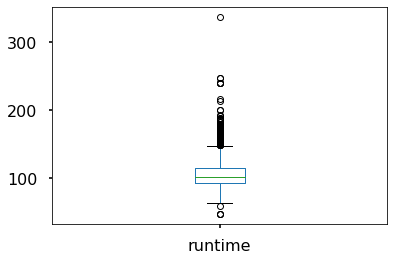

In [87]:
final_df["runtime"].plot(kind='box')

In [69]:
print(final_df['runtime'].max())
print(final_df['runtime'].min())
print(final_df['runtime'].median())

877.0
47.0
103.0


In [70]:
# Drop the 4 outliers seen in the plot
final_df = final_df.drop(
    final_df['runtime'].sort_values(ascending=False).head(4).index)

In [71]:
final_df['runtime'].max()   # Longest movies are still quite long, 5+ hrs

338.0

<AxesSubplot:ylabel='Frequency'>

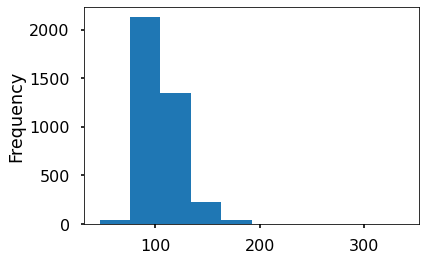

In [88]:
final_df['runtime'].plot(kind='hist')

In [74]:
def categorize_runtimes(x):
    if x < 90:
        return 'short'
    elif x < 120:
        return 'average'
    elif x < 150:
        return 'ave_to_long'
    else:
        return 'long'
        

In [75]:
runtime_median = final_df['runtime'].median()
final_df['runtime_categories'] = final_df['runtime'].apply(categorize_runtimes)

In [76]:
averages_runtime = final_df.groupby('runtime_categories').mean().reset_index()
averages_runtime

,runtime_categories,id,production_budget,worldwide_gross,runtime,percent_profit
0,ave_to_long,49.277165,5.778280e+07,1.693702e+08,129.497638,243.272456
1,average,50.624500,3.130274e+07,8.360373e+07,102.238591,259.774679
2,long,46.582609,7.491210e+07,2.703320e+08,171.713043,341.722662
3,short,50.118830,2.213525e+07,5.892909e+07,84.250457,470.922803


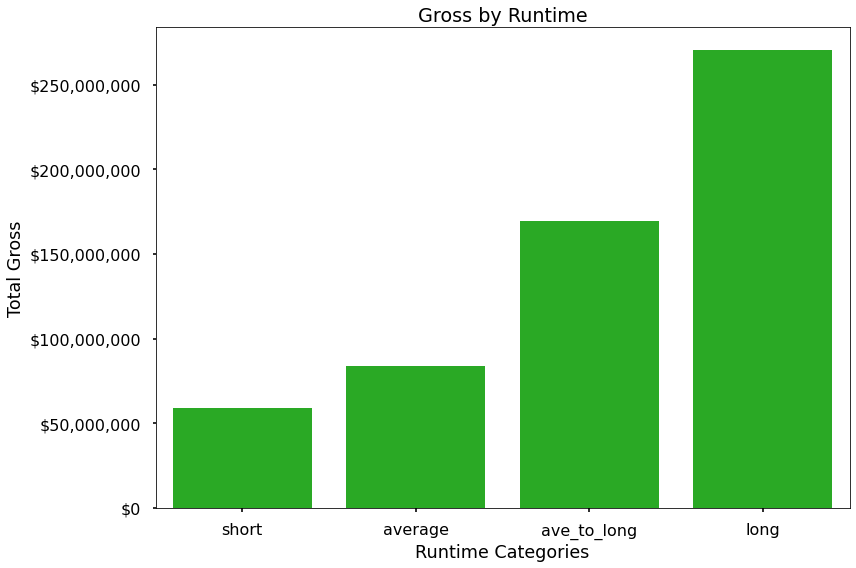

In [89]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='runtime_categories', 
            y='worldwide_gross', 
            data=averages_runtime.reindex([3,1,0,2]), 
            color='#15bf0f', 
            ax=ax)
ax.set(title='Gross by Runtime', xlabel='Runtime Categories', ylabel="Total Gross")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
fig.tight_layout()

## Budget vs Percent Return on Investment

In [93]:
final_df.head(2)

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,percent_profit,runtime_categories,release_date,month_release
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2009-12-10,162.0,2009,553.257713,long,2009-12-10,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011-05-14,136.0,2011,154.667286,ave_to_long,2011-05-14,5


## Month Release vs Total Gross Profit

In [79]:
# Create a column that is a datetime object, 'release_date'
final_df['release_date'] = pd.to_datetime(final_df['release_date_y'])

In [80]:
# Create new column 'month_release'
final_df['month_release'] = final_df['release_date'].dt.month

In [84]:
final_df.head(2)

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,percent_profit,runtime_categories,release_date,month_release
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2009-12-10,162.0,2009,553.257713,long,2009-12-10,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011-05-14,136.0,2011,154.667286,ave_to_long,2011-05-14,5


In [82]:
ave_month_gross_df = final_df.groupby('month_release').mean().reset_index()

In [83]:
ave_month_gross_df

,month_release,id,production_budget,worldwide_gross,runtime,percent_profit
0,1,50.523659,2.025629e+07,4.881467e+07,99.570978,364.383741
1,2,50.628159,3.150590e+07,9.324455e+07,104.776173,298.433528
2,3,49.530547,3.664546e+07,9.835046e+07,104.646302,297.316225
3,4,50.604096,3.496815e+07,9.802642e+07,104.805461,161.476891
4,5,50.468635,4.799585e+07,1.470482e+08,109.439114,217.132273
5,6,48.132841,5.454120e+07,1.788910e+08,105.546125,289.684949
6,7,50.856061,4.865098e+07,1.408824e+08,105.068182,373.277423
7,8,51.015576,3.091474e+07,7.518782e+07,104.834891,304.099223
8,9,49.818000,2.298265e+07,5.181822e+07,106.538000,272.346996
9,10,50.930233,2.794854e+07,7.162807e+07,105.764858,403.559779


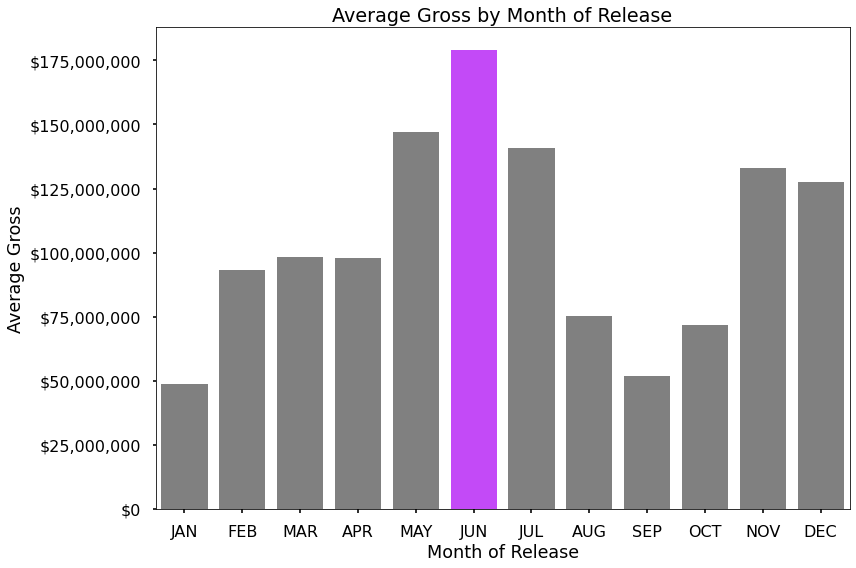

In [90]:
fig, ax = plt.subplots(figsize=(12,8))
#colors = ['grey','grey','grey','grey','grey','#c34af7','grey','grey','grey','grey','grey','grey']
bar = sns.barplot(data = ave_month_gross_df, x='month_release', y='worldwide_gross', color='grey')

ax.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax.set(title='Average Gross by Month of Release', xlabel='Month of Release', ylabel="Average Gross")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

# Change color of tallest bar
patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# np.argmax return the index of largest value of the list
idx_tallest = np.argmax(patch_h)   
bar.patches[idx_tallest].set_facecolor('#c34af7')  #a834a8

fig.tight_layout()